In [ ]:
#IMDB movie review set

In [20]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Convert the dataset from files to a python dataframe

df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
labels={'pos':1,'neg':0}

In [14]:
reviews=df.review.str.cat(sep='')

#function to split text into words
tokens=word_tokenize(reviews)
print("Tokens",tokens)
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[0:50]

Tokens 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

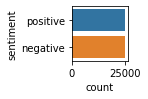

In [10]:
plt.figure(figsize=(1,1))
sns.countplot(y="sentiment",data=df)

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
tokens =[w for w in tokens if not w in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


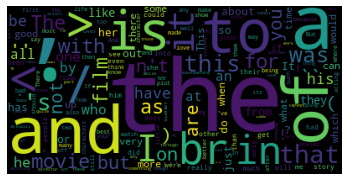

In [25]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
df.shape

(50000, 2)

In [29]:
#Building a Classifier
# After cleanup, it is time to build the classifier to identify 
# sentiment of each movie review.From the IMDb dataset,
# divide test and training sets of 25000 each

X_train = df.loc[:24999,'review'].values
y_train = df.loc[:24999,'sentiment'].values
X_test = df.loc[25000:,'review'].values
y_test= df.loc[25000:,'sentiment'].values

##scikit-learn provides tools to do pre-processing on text. We use TfidfTransformer to 
###convert the text corpus into feature vectors restricting max features to 10000.

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 76496) (25000, 76496)


In [35]:
#using NaiveBayes classifier and train the model on the training set
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(train_vectors, y_train)

In [37]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.85884
